### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from matplotlib import rc
from sklearn.model_selection import train_test_split

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.impute import SimpleImputer

# For better viewing of datasets
pd.set_option('display.max_columns', None)

### Reading in the data

In [73]:
#Read in the data
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [58]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Exploratory Data Analysis

Let's start by looking at the distribution of sales price. It would be helpfult to know whether the distribution is normal, if not what is the skewness and if we need to remove any outliers

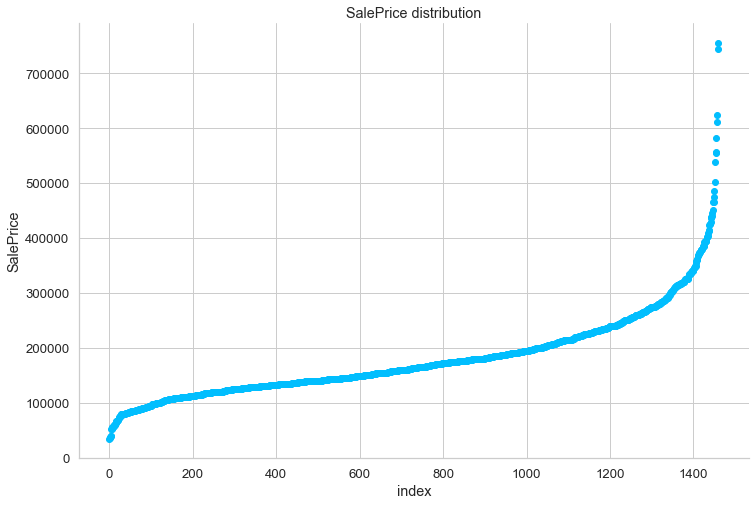

In [22]:
plt.scatter(range(train.shape[0]),np.sort(train['SalePrice'].values))
plt.xlabel('index')
plt.ylabel('SalePrice')
plt.title("SalePrice distribution")
sns.despine()

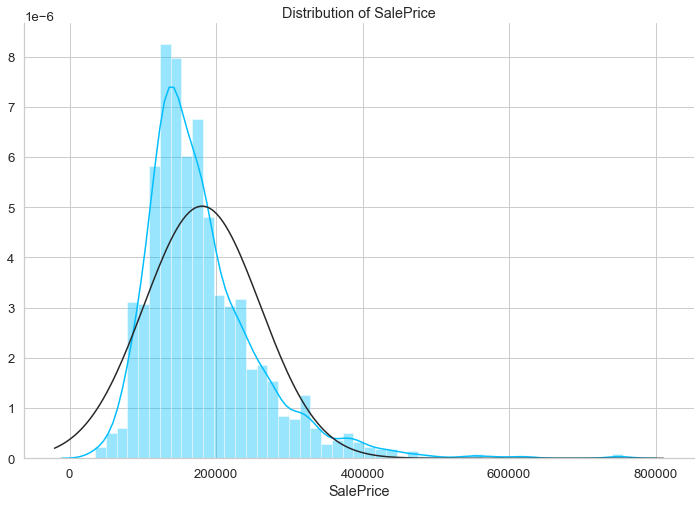

In [23]:
sns.distplot(train['SalePrice'], fit=norm)
plt.title("Distribution of SalePrice")
sns.despine()

In [24]:
print("Skewness is %f" % train['SalePrice'].skew())
print("Kurtosis is %f" % train['SalePrice'].kurt())

Skewness is 1.882876
Kurtosis is 6.536282


### Handling missing values & Categorical data

In [101]:
import pyod
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from pyod.models.iforest import IForest

class compiler:
    
    def __init__(self, 
                 drop_col_share=0.5,
                 use_impute=False,
                 encode_categorical=True,
                 ordinal_to_skip=None,
                 use_scaler=False,
                 random_state=42,
                 outliers_fraction=0):
        """
        Create a class object to pre-process data (train/test) before model training or predictions
        Parameters
        ----------
        drop_col_share: float, default 0.5
        Minimum share of filled rows required for a column to be kept, i.e. any column having less than these % of rows will be dropped
        use_impute: bool, default False
        If you want to impute missing values using mean & mode
        encode_categorical: bool, default True
        If you want to create dummy variables for the categorical columns using drop-first
        ordinal_to_skip: list(str), default None
        If there are any ordinal variables that you would want not to be encoded
        use_scaler: bool, default False
        If you want to use Standard Scaler for standardizing numeric columns
        random_state: int, default 42
        To make sure repeated runs do no result in different outcomes for outlier detection
        outliers_fraction: float, default 0
        Value between 0-1 to drop x% of data points from low density regions using pyod package
        """
        # Add assert statements to validate inputs        
        self.drop_col_share = drop_col_share
        self.use_impute = use_impute
        self.encode_categorical = encode_categorical
        self.ordinal_to_skip = ordinal_to_skip
        self.use_scaler = use_scaler
        self.imputer_num = None
        self.imputer_cat = None
        self.scaler = None
        self.random_state = np.random.RandomState(random_state)
        self.outliers_fraction = outliers_fraction
        self.drop_cols = None
        self.numeric_cols = None
        self.cat_cols = None
        self.ordinal_cols = None
        self.missing_val_num = None
        self.missing_val_cat = None
        self.clf = None
        
        
    def fit_transform(self, data=None):
        # Creating a copy of supplied dataframe
        df = data.copy()
        
        # Computing the number of NA values for each column
        NA_counts = df.isna().sum(axis=0).values

        # Creating a list of columns to drop as they have more than specified values missing
        self.drop_cols = df.columns[NA_counts > self.drop_col_share * df.shape[0]]

        # Let's drop these columns from both train & test datasets
        df.drop(columns=self.drop_cols.values,inplace=True)
        
        # If imputing is required
        if(self.use_impute):
            
            # Creating an array with number of missing values per column
            NA_count_num = df.select_dtypes(exclude=['object']).isna().sum().values
            NA_count_cat = df.select_dtypes(include=['object']).isna().sum().values

            # Creating a list of column names with missing values
            self.missing_val_num = df.select_dtypes(exclude=['object']).columns[NA_count_num > 0]
            self.missing_val_cat = df.select_dtypes(include=['object']).columns[NA_count_cat > 0]

            # Initialize simple imputers for both column types
            # There are further complicated ways to impute like regression, KNN, etc. but we will start simple here
            self.imputer_num = SimpleImputer(missing_values=np.nan, strategy='mean')
            self.imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

            # Doing the imputation in training data
            df[self.missing_val_num] = pd.DataFrame(self.imputer_num.fit_transform(df[self.missing_val_num]), columns=self.missing_val_num)
            df[self.missing_val_cat] = pd.DataFrame(self.imputer_cat.fit_transform(df[self.missing_val_cat]), columns=self.missing_val_cat)
        
        
        # Let's break down the columns with missing values into numeric, categorical, and ordinal
        self.numeric_cols = df.select_dtypes(exclude=['object']).columns
        if(self.ordinal_to_skip):
            self.cat_cols = df.select_dtypes(include=['object']).columns.difference(self.ordinal_to_skip)
            self.ordinal_cols = self.ordinal_to_skip
        else:
            self.cat_cols = df.select_dtypes(include=['object']).columns        
        
        # If scaling is required
        if(self.use_scaler):
            
            # Scaling the numeric columns
            self.scaler = StandardScaler()
            df[self.numeric_cols] = pd.DataFrame(self.scaler.fit_transform(df[self.numeric_cols]), columns=self.numeric_cols)
        
        # If encoding is required
        if(self.encode_categorical):
            
            # Encoding categorical data
            encoded_cols = pd.get_dummies(df[self.cat_cols], prefix=self.cat_cols, drop_first=True)
            
            # Changing df as column structure has changed
            if(self.ordinal_to_skip):
                df = pd.concat([df[self.numeric_cols], encoded_cols, df[self.ordinal_cols]], axis=1)
            else:
                df = pd.concat([df[self.numeric_cols], encoded_cols], axis=1)
                
        
        # If outlier removal is required
        if(self.outliers_fraction > 0):
            
            # Initializing an Isolation forest object
            self.clf = IForest(contamination=self.outliers_fraction,random_state=self.random_state)
            self.clf.fit(df)

            # predict raw anomaly score
            scores_pred = self.clf.decision_function(df) * -1

            # prediction of a datapoint category outlier or inlier
            y_pred = self.clf.predict(df)

            # Adding outlier label as a column
            df['outlier'] = y_pred.tolist()
        
            df = df[df['outlier'] == 0]
        
        df = df.drop(columns = ['outlier'], errors='ignore')
        
        # Save the list of final columns to class object
        self.final_cols = df.columns
        return df
    
    def transform(self, data=None):
        # Creating a copy of supplied dataframe
        df = data.copy()
        
        # Let's bring column names created from training data as local variables here
        numeric_cols = self.numeric_cols
        ordinal_cols = self.ordinal_cols
        cat_cols = self.cat_cols
        drop_cols = self.drop_cols
        missing_val_num = self.missing_val_num
        missing_val_cat = self.missing_val_cat

        # Let's drop these columns from both train & test datasets
        df.drop(columns=drop_cols.values,inplace=True)
        
        # If imputing is required
        if(self.use_impute):
            
            # Doing the imputation in test data
            df[missing_val_num] = pd.DataFrame(self.imputer_num.transform(df[missing_val_num]), columns=missing_val_num)
            df[missing_val_cat] = pd.DataFrame(self.imputer_cat.transform(df[missing_val_cat]), columns=missing_val_cat)
        
        

        # If scaling is required
        if(self.use_scaler):
            
            df[numeric_cols] = pd.DataFrame(self.scaler.transform(df[numeric_cols]), columns=numeric_cols)
        
        # If encoding is required
        if(self.encode_categorical):
            
            # Encoding categorical data
            encoded_cols = pd.get_dummies(df[cat_cols], prefix=cat_cols, drop_first=True)
            
            # Changing df as column structure has changed
            if(self.ordinal_to_skip):
                df = pd.concat([df[numeric_cols], encoded_cols, df[ordinal_cols]], axis=1)
            else:
                df = pd.concat([df[numeric_cols], encoded_cols], axis=1)
        
        # Make sure the columns are same as training (Because of missing nominal variable values)
        # Get missing columns in the training test
        missing_cols = set( self.final_cols ) - set( df.columns )
        # Add a missing column in test set with default value equal to 0
        for c in missing_cols:
            df[c] = 0
        # Ensure the order of column in the test set is in the same order than in train set
        df = df[self.final_cols]
        
        return df

In [102]:
# Initializing a processor object
processor = compiler(drop_col_share=0.5,
                     use_impute=True,
                     encode_categorical=True,
                     ordinal_to_skip=None,
                     use_scaler=True,
                     outliers_fraction=0.05)

In [107]:
# Creating X & y datasets from train
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
# As test data is similar to X here, we don't need to subset that

In [108]:
train_X = processor.fit_transform(X)
test_X = processor.transform(test)
train_y = y.loc[train_X.index]

In [111]:
train_X.shape

(1387, 237)

In [110]:
test_X.shape

(1459, 237)

In [123]:
# Reset index as some observations were dropped from training data
train_X.reset_index(inplace=True, drop=True)
train_y.reset_index(inplace=True, drop=True)

So now we have removed outliers from train data, and have transformed both train & test data

### Modelling Stage

### Linear Models

Let's start by exploring the basic linear models. We will be trying out the following:
* Linear Regression
* Lasso Regression (L1 Regularization)
* Ridge Regression (L2 Regularization)
* ElasticNet Regression (Combination of L1 & L2)
* Polynomial Regression

#### Linear Regression

Starting with the linear regression model, we will first need to perform some data wrangling steps to make the data suitable for Linear Regression:
* Feature selection as Linear Regression will not be able to work with 237 features. We will use "SelectBestK" from scikit-learn and pearson correlation to get the best 10-15 variables
* Validating the assumptions of linear regression. Once we have the residuals & predictions, we can check for the 5 assumptions of linear regressions -
  - **Linearity**: This one is fine as we assuming that there is a linear relationship between the 'SalePrice' and features of the house
  - **Normality**: We will conduct Shapiro-Wilk & Kolmogorov-Smirnov test for normality of the residuals
  - **Auto-collinearity**: Durbin-Watson test for checking auto-correlation in residuals
  - **Homoskedasticity**: We will use the Breush-Pagan test from statsmodel to test for this
  - **Multicollinearity**: We will use VIF to check if there is significant multicollinearity in the data

First we will reduce the feature set to a lower number (30) using "Filter" category of feature selection, based on correlation using SelectKBest & f_regression. After that, we will use RFE to test what number of features works best from 5 to 30 and accordingly use that many features

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression, SelectKBest, RFE
from sklearn.model_selection import KFold, cross_val_score

# Initialize a linear regression object
linreg = LinearRegression()

# define feature selection
key_fs = SelectKBest(score_func=f_regression, k=30)

# apply feature selection
X_selected = key_fs.fit_transform(train_X, train_y)

# Capturing the column names for selected features
kbest_features = train_X.columns[key_fs.get_support()]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [240]:
# Taking out 20% of training data for testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, train_y, test_size = 0.2, random_state = 42)

In [241]:
# Training the linear regression model
cross_val_score(linreg, X_train, y_train, cv=5, scoring = 'neg_root_mean_squared_error').mean()

-26615.13008716357

In [242]:
from sklearn.model_selection import GridSearchCV

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(5, 30))}]

# specify model
linreg.fit(X_train, y_train)
rfe = RFE(linreg)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [5, 6, 7, 8, 9, 10, 11, 12,
                                                   13, 14, 15, 16, 17, 18, 19,
                                                   20, 21, 22, 23, 24, 25, 26,
                                                   27, 28, 29]}],
             return_train_score=True, scoring='r2', verbose=1)

In [243]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.056164,0.012522,0.002065,0.001625,5,{'n_features_to_select': 5},0.734154,0.726286,0.643273,0.647913,0.691035,0.688532,0.037977,25,0.729635,0.731863,0.726367,0.729323,0.720334,0.727504,0.003989
1,0.055924,0.004344,0.001600,0.001959,6,{'n_features_to_select': 6},0.810324,0.823196,0.747428,0.749371,0.792837,0.784631,0.031119,24,0.794757,0.791974,0.805163,0.807870,0.796777,0.799308,0.006140
2,0.057422,0.002932,0.000685,0.000953,7,{'n_features_to_select': 7},0.822520,0.816761,0.751885,0.760945,0.793439,0.789110,0.028560,23,0.797946,0.799676,0.810559,0.811795,0.803423,0.804680,0.005606
3,0.054626,0.004043,0.000800,0.001600,8,{'n_features_to_select': 8},0.822521,0.863568,0.816590,0.829457,0.843649,0.835157,0.016829,22,0.797946,0.853160,0.861571,0.860925,0.857300,0.846180,0.024303
4,0.049295,0.004643,0.002210,0.001611,9,{'n_features_to_select': 9},0.874688,0.863943,0.816579,0.834330,0.840652,0.846038,0.020858,21,0.850167,0.855425,0.861582,0.862254,0.860666,0.858019,0.004605
5,0.050342,0.007428,0.000801,0.001601,10,{'n_features_to_select': 10},0.875244,0.861650,0.821803,0.834145,0.840630,0.846694,0.019249,20,0.852395,0.857922,0.862881,0.864336,0.860704,0.859648,0.004222
6,0.049417,0.007163,0.000808,0.001615,11,{'n_features_to_select': 11},0.872105,0.860382,0.826360,0.834144,0.844909,0.847580,0.016753,19,0.855033,0.869548,0.864161,0.864412,0.861342,0.862899,0.004741
7,0.043598,0.005287,0.000000,0.000000,12,{'n_features_to_select': 12},0.874689,0.859512,0.847912,0.846366,0.857425,0.857181,0.010148,18,0.866265,0.875509,0.871151,0.873280,0.869860,0.871213,0.003132
8,0.049324,0.003240,0.001800,0.001833,13,{'n_features_to_select': 13},0.876245,0.860688,0.853660,0.849684,0.862325,0.860520,0.009111,17,0.873212,0.875520,0.876505,0.879632,0.875359,0.876046,0.002091
9,0.041391,0.004160,0.001600,0.001959,14,{'n_features_to_select': 14},0.876170,0.863256,0.855776,0.849250,0.867555,0.862402,0.009314,14,0.873915,0.880201,0.881271,0.880635,0.879476,0.879099,0.002657


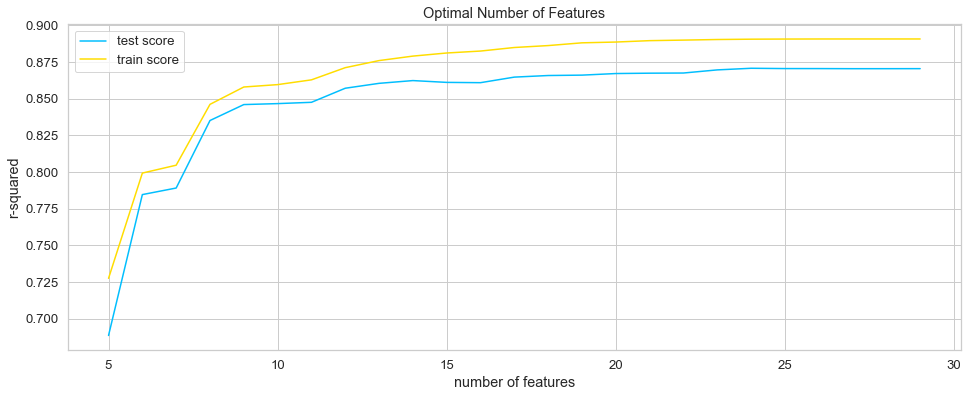

In [244]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

#### From this, it appears **25** can be the right number of params to select

In [245]:
from sklearn.metrics import r2_score, mean_squared_error

# Final Linear Regression Model
n_features_optimal = 25

# Fitting the model
linreg.fit(X_train, y_train)

rfe = RFE(linreg, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

# Let's compute RMSE as well
print(mean_squared_error(y_test, y_pred, squared=False))

# Capturing the column names for final features selected
rfe_features = kbest_features[rfe.get_support()]

0.8720676632171748
27525.94969243971


Now that we have the results from Linear Regression Model. Let's test the assumptions for linear regression as well.

In [262]:
from scipy.stats import shapiro,kstest
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

def check_linreg_assumptions(X_train = None,
                             y_train = None,
                             feature_names = None,
                            linmodel = None,
                            significance_level = 0.05):
    
    # Get the predicted values for training set from model
    y_pred = linmodel.predict(X_train)
    
    # Compute residuals
    resid = y_train - y_pred
    
    # Plotting the residuals
    print("Here is a distribution of residuals:\n")
    sns.distplot(resid, fit=norm)
    plt.title("Distribution of Residuals")
    sns.despine()
    plt.show()
    
    # Printing the skewness and kurtosis
    print("Skewness is {:.2f}\tKurtosis is {:.2f}\n\n".format(resid.skew(),resid.kurt()))
    
    # Testing for normality of residuals
    print("Test 1/4: Testing for normality of residuals:\n")
    print("Using Shapiro Wilik test for checking normality of residuals:\n")
    shapiro_result = shapiro(resid)
    if(shapiro_result.pvalue > significance_level):
        print("p-value is {:e}. Residuals are normally distributed.\n".format(shapiro_result.pvalue))
    else:
        print("p-value is {:e}. Residuals are not normally distributed.\n".format(shapiro_result.pvalue))
        
    print("Using Kosmogorov-Smirnov test for checking normality of residuals:\n")
    ks_result = kstest(resid, 'norm')
    if(ks_result.pvalue > significance_level):
        print("p-value is {:e}. Residuals are normally distributed.\n".format(ks_result.pvalue))
    else:
        print("p-value is {:e}. Residuals are not normally distributed.\n".format(ks_result.pvalue))
        
    # Testing for auto-correlation of reiduals
    print("Test 2/4: Testing for auto-collinearity in residuals:\n")
    print("Using Durbin-Watson test for auto-collinearity:\n")
    
    dw_result =  durbin_watson(resid)
    if(dw_result >= 1.5 and dw_result <= 2.5):
        print("Test-statistic is {:.2f}. There is no significant auto-correlation.\n".format(dw_result))
    elif(dw_result < 1.5):
        print("Test-statistic is {:.2f}. There is significant positive auto-correlation.\n".format(dw_result))
    else:
        print("Test-statistic is {:.2f}. There is significant negative auto-correlation.\n".format(dw_result))
        
    
    # Testing for Homoskedasticity of residuals
    print("Test 3/4: Testing for homoskedasticity of residuals:\n")
    print("Using Breush-Pagan test for this:\n")
    
    bp_result = het_breuschpagan(resid, X_train) # See if you need to supply just values
    if(bp_result[3] > significance_level):
        print("p-value is {:e}. Residuals are homoskedastic relative to given X values.\n".format(bp_result[3]))
    else:
        print("p-value is {:e}. Residuals are not homoskedastic relative to given X values.\n".format(bp_result[3]))
    
    
    # Testing for multicollinearity within X-variables
    print("Test 4/4: Testing for multicollinearity among X variables:\n")
    print("Using Variance Inflation Factor (VIF) to test for this:\n")
    # VIF dataframe 
    vif_data = pd.DataFrame() 
    vif_data["feature"] = feature_names

    # calculating VIF for each feature 
    vif_data["VIF"] = [VIF(X_train, i) 
                              for i in range(len(feature_names))]
    
    print(vif_data)
    
    if(max(vif_data['VIF']) > 5):
        print("There is significant multicollinearity amongst the features provided. Look at the table above.")
    else:
        print("There is no significant multicollinearity in the features provided. All good!")

In [263]:
kstest((y_pred - y_test),'norm')

KstestResult(statistic=0.5431654676258992, pvalue=2.2468231165422017e-77)

Here is a distribution of residuals:



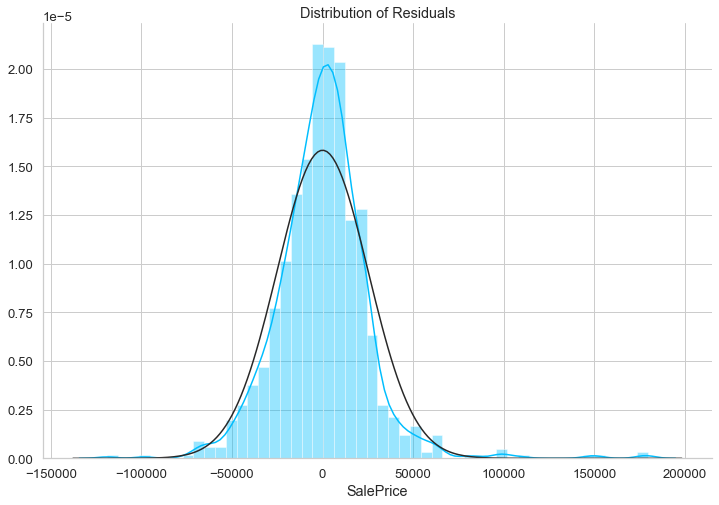

Skewness is 0.98	Kurtosis is 7.57


Test 1/4: Testing for normality of residuals:

Using Shapiro Wilik test for checking normality of residuals:

p-value is 5.229469e-23. Residuals are not normally distributed.

Using Kosmogorov-Smirnov test for checking normality of residuals:

p-value is 2.228281e-261. Residuals are not normally distributed.

Test 2/4: Testing for auto-collinearity in residuals:

Using Durbin-Watson test for auto-collinearity:

Test-statistic is 1.98. There is no significant auto-correlation.

Test 3/4: Testing for homoskedasticity of residuals:

Using Breush-Pagan test for this:

p-value is 1.758917e-63. Residuals are not homoskedastic relative to given X values.

Test 4/4: Testing for multicollinearity among X variables:

Using Variance Inflation Factor (VIF) to test for this:

                  feature        VIF
0             LotFrontage   1.374264
1             OverallQual   3.415140
2               YearBuilt   5.083978
3            YearRemodAdd   2.156820
4    

In [261]:
check_linreg_assumptions(X_train, y_train, feature_names=rfe_features, linmodel=rfe)

## Conclusion
While the residual distribution appears normal to the eye, it is not. Moreover, it fails the other assumptions outlined for a linear regression model. Therefore, despite explaining 87% of the variance Linear Regression Model is not a good choice in this case. We will still give a try at using lasso regularization to see if that provides any better metric results.

In [276]:
from sklearn.linear_model import ElasticNetCV

# Initializing the Elastic Net model
elnetcv = ElasticNetCV(l1_ratio=[0.01, .1, .5, .7, .9, .95, .99, 1],cv=5)

# Creating train & test datasets from original wide datasets
X_train_new, X_test_new, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 42)

# Training the model
elnetcv.fit(X_train_new, y_train)

# Print the cv score on training set
print(elnetcv.score(X_train_new, y_train))

0.9312523623557404


In [277]:
# Evaluating metrics on test set
y_pred = elnetcv.predict(X_test_new)
print(r2_score(y_test, y_pred))

# Let's compute RMSE as well
print(mean_squared_error(y_test, y_pred, squared=False))

0.8923917041539627
25244.97949656442


So, on the training set our variance went up to 93%, which is great. However, on the test set we are up by 2% only. But the RMSE has dropped significantly

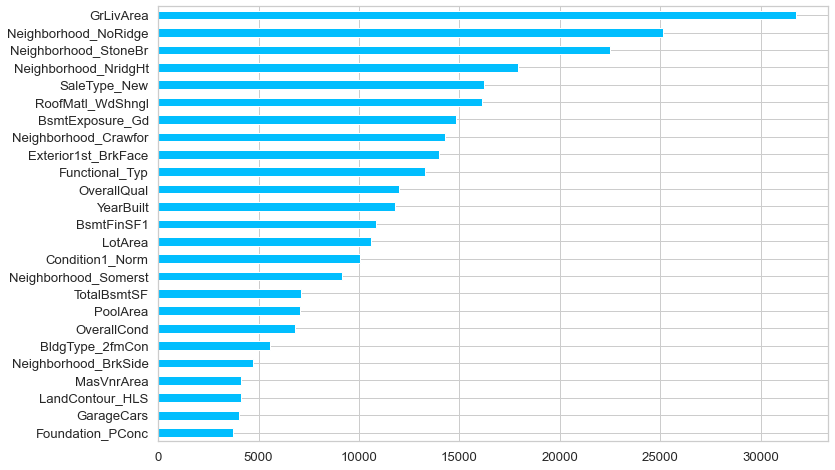

In [278]:
top_coef = pd.Series(elnetcv.coef_, index=list(train_X.columns)).sort_values()

top_coef.tail(25).plot(kind = 'barh')

## Conclusion
Instead of spending herculean efforts on making the linear regression model work, we can get equal or better results by directly using ElasticNet model with cross-validation to get the best features. Also, while RFE does not tell which feature is best or better than others, ElasticNet gives us exact coefficient values to understand relative importance. For e.g. *GrLivArea has the largest impact on saleprice here*

# Next up: Other regression techniques
Let's try now to assess if we can get better performance R2-score and RMSE values using more complicated regression techniques. The ones I am planning to cover are:
* Support Vector
* Decision Tree 
* Random Forest
* XGBoost
* LightGBM
* Multilayer Perceptron